In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
stock = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
stock.reset_index(inplace=True)
print(stock.head())


/tmp/ipython-input-3-3437944790.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
1      2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800
2      2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
3      2020-01-07  72.146950  72.753831  71.926922  72.497537  108872000
4      2020-01-08  73.307518  73.609752  71.849540  71.849540  132079200


In [ ]:
# Shift Close column to get next day's close price
stock['Next_Close'] = stock['Close'].shift(-1)

# Drop last row (NaN in Next_Close)
stock = stock[:-1]

# Define features and target
X = stock[['Open', 'High', 'Low', 'Volume']]
y = stock['Next_Close']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)  # no shuffling for time series


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [ ]:
def evaluate(y_test, y_pred, model_name):
    print(f"\nEvaluation for {model_name}")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

evaluate(y_test, y_pred_lr, "Linear Regression")




Evaluation for Linear Regression
R2 Score: 0.9579013732048854
RMSE: 2.2307138260398798


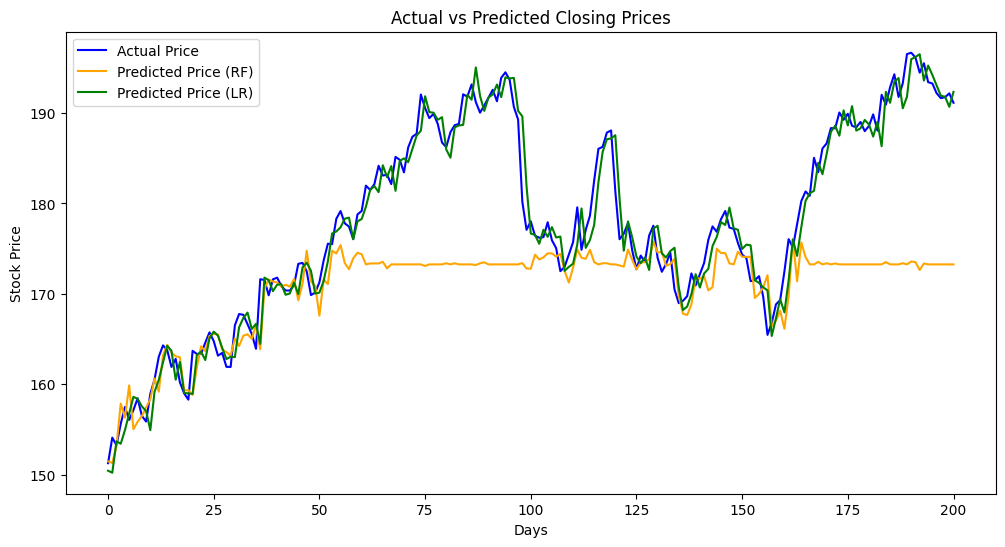

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred_rf, label='Predicted Price (RF)', color='orange')
plt.plot(y_pred_lr, label='Predicted Price (LR)', color='green')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
